In [9]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# task vs task

In [10]:
#load the data
with open('data/vicuna_metrics.pkl', 'rb') as f:
    data = pickle.load(f)

In [11]:
print(data.keys())

dict_keys(['answer_vicuna-7B_summarisation_arxiv_0.65.pkl', 'answer_vicuna-7B_reconstruction_news_0.5.pkl', 'answer_vicuna-13B_summarisation_arxiv_0.8.pkl', 'answer_vicuna-7B_qa_news_0.35.pkl', 'answer_vicuna-13B_reconstruction_news_0.35.pkl', 'answer_vicuna-7B_reconstruction_arxiv_0.5.pkl', 'answer_vicuna-13B_reconstruction_arxiv_0.2.pkl', 'answer_vicuna-7B_reconstruction_arxiv_0.65.pkl', 'answer_vicuna-7B_qa_news_0.2.pkl', 'answer_vicuna-7B_qa_arxiv_0.2.pkl', 'answer_vicuna-13B_summarisation_news_0.5.pkl', 'answer_vicuna-13B_qa_arxiv_0.35.pkl', 'answer_vicuna-13B_summarisation_arxiv_0.35.pkl', 'answer_vicuna-7B_summarisation_news_0.35.pkl', 'answer_vicuna-13B_reconstruction_news_0.5.pkl', 'answer_vicuna-7B_qa_news_0.5.pkl', 'answer_vicuna-7B_reconstruction_news_0.2.pkl', 'answer_vicuna-13B_reconstruction_arxiv_0.5.pkl', 'answer_vicuna-13B_qa_news_0.8.pkl', 'answer_vicuna-7B_summarisation_news_0.2.pkl', 'answer_vicuna-13B_qa_arxiv_0.2.pkl', 'answer_vicuna-7B_qa_arxiv_0.35.pkl', 'answe

In [12]:
summarisation = {}

for key, value in data.items():
    if 'summarisation' in key:
        summarisation[key] = value

In [13]:
summarisation.keys()

dict_keys(['answer_vicuna-7B_summarisation_arxiv_0.65.pkl', 'answer_vicuna-13B_summarisation_arxiv_0.8.pkl', 'answer_vicuna-13B_summarisation_news_0.5.pkl', 'answer_vicuna-13B_summarisation_arxiv_0.35.pkl', 'answer_vicuna-7B_summarisation_news_0.35.pkl', 'answer_vicuna-7B_summarisation_news_0.2.pkl', 'answer_vicuna-7B_summarisation_arxiv_0.2.pkl', 'answer_vicuna-7B_summarisation_news_0.5.pkl', 'answer_vicuna-7B_summarisation_arxiv_0.35.pkl', 'answer_vicuna-7B_summarisation_news_0.8.pkl', 'answer_vicuna-13B_summarisation_news_0.35.pkl', 'answer_vicuna-7B_summarisation_arxiv_0.8.pkl', 'answer_vicuna-13B_summarisation_arxiv_0.65.pkl', 'answer_vicuna-13B_summarisation_news_0.2.pkl', 'answer_vicuna-7B_summarisation_arxiv_0.5.pkl', 'answer_vicuna-13B_summarisation_news_0.65.pkl', 'answer_vicuna-13B_summarisation_arxiv_0.5.pkl', 'answer_vicuna-13B_summarisation_arxiv_0.2.pkl', 'answer_vicuna-7B_summarisation_news_0.65.pkl', 'answer_vicuna-13B_summarisation_news_0.8.pkl'])

In [14]:
summarisation['answer_vicuna-7B_summarisation_news_0.35.pkl']['self-info-phrase'].keys()

dict_keys(['bleu', 'precisions', 'brevity_penalty', 'length_ratio', 'translation_length', 'reference_length', 'meteor', 'rouge1', 'rouge2', 'rougeL', 'rougeLsum', 'bertscore_precision', 'bertscore_recall', 'bertscore_f1'])

## 1.bleu

In [15]:
# load the values of bleu
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]
summarisation_bleu_values = {reduction: [] for reduction in reduction_values}
reconstruction_bleu_values = {reduction: [] for reduction in reduction_values}
qa_bleu_values = {reduction: [] for reduction in reduction_values}
summarisation_bleu_values

{0.2: [], 0.35: [], 0.5: [], 0.65: [], 0.8: []}

In [16]:
for key in data.keys():
    if 'summarisation' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                summarisation_bleu_values[reduction].append(data[key]['self-info-phrase']['bleu'])
    elif 'reconstruction' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                reconstruction_bleu_values[reduction].append(data[key]['self-info-phrase']['bleu'])
    elif 'qa' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                qa_bleu_values[reduction].append(data[key]['self-info-phrase']['bleu'])

summarisation_bleu_values

{0.2: [0.3238320661401498,
  0.39300186234259593,
  0.3752818068929092,
  0.3561253395334144],
 0.35: [0.29124032038880093,
  0.27012192327302154,
  0.31459615814608444,
  0.29347163595716763],
 0.5: [0.23670182554937674,
  0.22169585746903428,
  0.22298641533650118,
  0.22791488013810943],
 0.65: [0.14657801065989928,
  0.14986272813509205,
  0.16372530681037853,
  0.15648880444031432],
 0.8: [0.08632604013788117,
  0.0796910813027953,
  0.08294782621290801,
  0.07828678464706619]}

In [17]:
# calculate the avarage bleu
summarisation_bleu_values = [np.mean(summarisation_bleu_values[reduction]) for reduction in reduction_values]
reconstruction_bleu_values = [np.mean(reconstruction_bleu_values[reduction]) for reduction in reduction_values]
qa_bleu_values = [np.mean(qa_bleu_values[reduction]) for reduction in reduction_values]
summarisation_bleu_values,reconstruction_bleu_values,qa_bleu_values

([0.3620602687272674,
  0.2923575094412686,
  0.22732474462325541,
  0.15416371251142105,
  0.08181293307516267],
 [0.5383323253101076,
  0.4495975897915245,
  0.35220341222091983,
  0.20169451085453127,
  0.06395603846013036],
 [0.6593606151827671,
  0.5668059903137322,
  0.487171992653502,
  0.4147103596617115,
  0.3719944212525068])

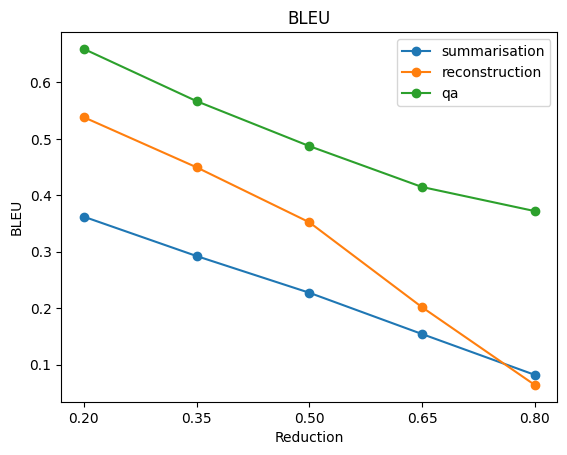

In [35]:
# Plot results
plt.plot(reduction_values, summarisation_bleu_values, 'o-', label='summarisation')
plt.plot(reduction_values, reconstruction_bleu_values, 'o-', label='reconstruction')
plt.plot(reduction_values, qa_bleu_values, 'o-', label='qa')


plt.title('BLEU')
plt.xlabel('Reduction')
plt.ylabel('BLEU')

plt.xticks(reduction_values)

plt.legend()
plt.show()


## 2. meteor

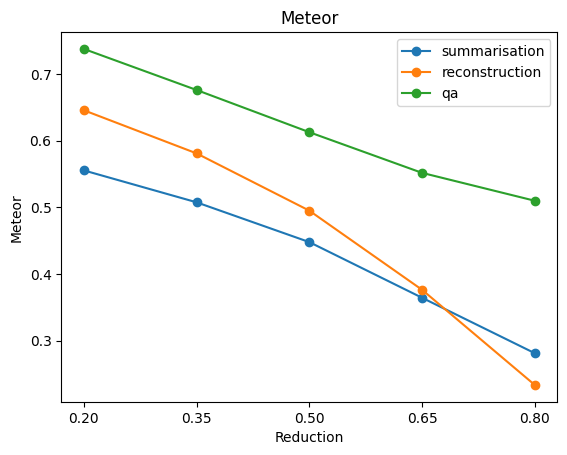

In [34]:
# load the values of meteor
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]
summarisation_meteor_values = {reduction: [] for reduction in reduction_values}
reconstruction_meteor_values = {reduction: [] for reduction in reduction_values}
qa_meteor_values = {reduction: [] for reduction in reduction_values}

for key in data.keys():
    if 'summarisation' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                summarisation_meteor_values[reduction].append(data[key]['self-info-phrase']['meteor'])
    elif 'reconstruction' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                reconstruction_meteor_values[reduction].append(data[key]['self-info-phrase']['meteor'])
    elif 'qa' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                qa_meteor_values[reduction].append(data[key]['self-info-phrase']['meteor'])

# calculate the avarage meteor
summarisation_meteor_values = [np.mean(summarisation_meteor_values[reduction]) for reduction in reduction_values]
reconstruction_meteor_values = [np.mean(reconstruction_meteor_values[reduction]) for reduction in reduction_values]
qa_meteor_values = [np.mean(qa_meteor_values[reduction]) for reduction in reduction_values]


# Plot results
plt.plot(reduction_values, summarisation_meteor_values, 'o-', label='summarisation')
plt.plot(reduction_values, reconstruction_meteor_values, 'o-', label='reconstruction')
plt.plot(reduction_values, qa_meteor_values, 'o-', label='qa')


plt.title('Meteor')
plt.xlabel('Reduction')
plt.ylabel('Meteor')

plt.xticks(reduction_values)

plt.legend()
plt.show()



## 3.Rouge1

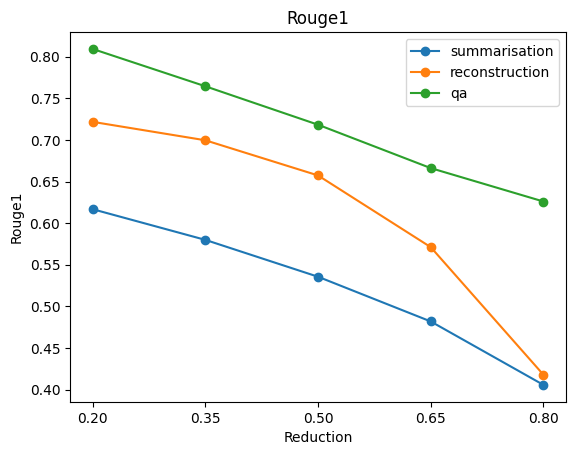

In [33]:
# load the values of rouge1
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]
summarisation_rouge1_values = {reduction: [] for reduction in reduction_values}
reconstruction_rouge1_values = {reduction: [] for reduction in reduction_values}
qa_rouge1_values = {reduction: [] for reduction in reduction_values}

for key in data.keys():
    if 'summarisation' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                summarisation_rouge1_values[reduction].append(data[key]['self-info-phrase']['rouge1'])
    elif 'reconstruction' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                reconstruction_rouge1_values[reduction].append(data[key]['self-info-phrase']['rouge1'])
    elif 'qa' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                qa_rouge1_values[reduction].append(data[key]['self-info-phrase']['rouge1'])

# calculate the avarage rouge1
summarisation_rouge1_values = [np.mean(summarisation_rouge1_values[reduction]) for reduction in reduction_values]
reconstruction_rouge1_values = [np.mean(reconstruction_rouge1_values[reduction]) for reduction in reduction_values]
qa_rouge1_values = [np.mean(qa_rouge1_values[reduction]) for reduction in reduction_values]


# Plot results
plt.plot(reduction_values, summarisation_rouge1_values, 'o-', label='summarisation')
plt.plot(reduction_values, reconstruction_rouge1_values, 'o-', label='reconstruction')
plt.plot(reduction_values, qa_rouge1_values, 'o-', label='qa')


plt.title('Rouge1')
plt.xlabel('Reduction')
plt.ylabel('Rouge1')

plt.xticks(reduction_values)

plt.legend()
plt.show()



## 4. Rouge2

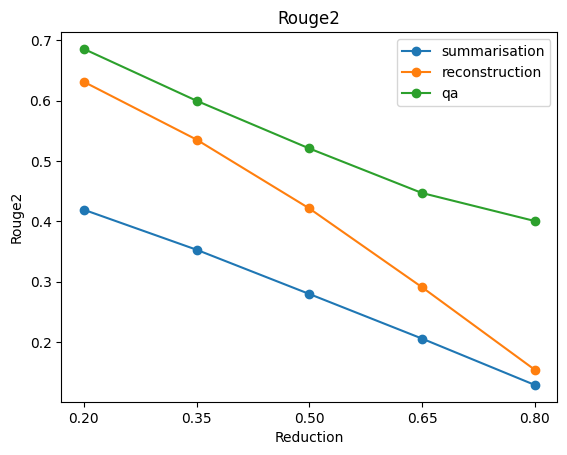

In [32]:
# load the values of rouge2
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]
summarisation_rouge2_values = {reduction: [] for reduction in reduction_values}
reconstruction_rouge2_values = {reduction: [] for reduction in reduction_values}
qa_rouge2_values = {reduction: [] for reduction in reduction_values}

for key in data.keys():
    if 'summarisation' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                summarisation_rouge2_values[reduction].append(data[key]['self-info-phrase']['rouge2'])
    elif 'reconstruction' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                reconstruction_rouge2_values[reduction].append(data[key]['self-info-phrase']['rouge2'])
    elif 'qa' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                qa_rouge2_values[reduction].append(data[key]['self-info-phrase']['rouge2'])

# calculate the avarage rouge2
summarisation_rouge2_values = [np.mean(summarisation_rouge2_values[reduction]) for reduction in reduction_values]
reconstruction_rouge2_values = [np.mean(reconstruction_rouge2_values[reduction]) for reduction in reduction_values]
qa_rouge2_values = [np.mean(qa_rouge2_values[reduction]) for reduction in reduction_values]


# Plot results
plt.plot(reduction_values, summarisation_rouge2_values, 'o-', label='summarisation')
plt.plot(reduction_values, reconstruction_rouge2_values, 'o-', label='reconstruction')
plt.plot(reduction_values, qa_rouge2_values, 'o-', label='qa')


plt.title('Rouge2')
plt.xlabel('Reduction')
plt.ylabel('Rouge2')

plt.xticks(reduction_values)

plt.legend()
plt.show()



## 5 RougeL

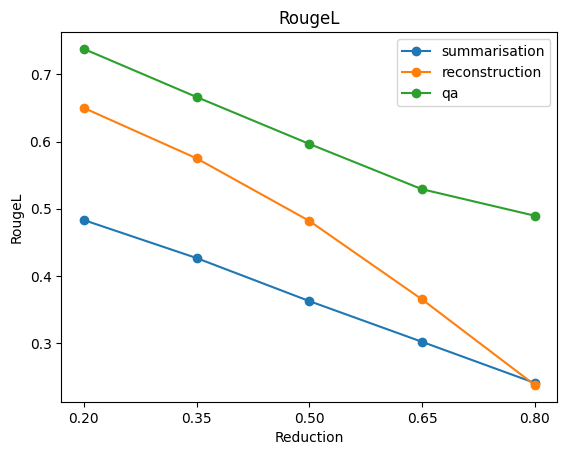

In [31]:
# load the values of rougeL
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]
summarisation_rougeL_values = {reduction: [] for reduction in reduction_values}
reconstruction_rougeL_values = {reduction: [] for reduction in reduction_values}
qa_rougeL_values = {reduction: [] for reduction in reduction_values}

for key in data.keys():
    if 'summarisation' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                summarisation_rougeL_values[reduction].append(data[key]['self-info-phrase']['rougeL'])
    elif 'reconstruction' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                reconstruction_rougeL_values[reduction].append(data[key]['self-info-phrase']['rougeL'])
    elif 'qa' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                qa_rougeL_values[reduction].append(data[key]['self-info-phrase']['rougeL'])

# calculate the avarage rougeL
summarisation_rougeL_values = [np.mean(summarisation_rougeL_values[reduction]) for reduction in reduction_values]
reconstruction_rougeL_values = [np.mean(reconstruction_rougeL_values[reduction]) for reduction in reduction_values]
qa_rougeL_values = [np.mean(qa_rougeL_values[reduction]) for reduction in reduction_values]


# Plot results
plt.plot(reduction_values, summarisation_rougeL_values, 'o-', label='summarisation')
plt.plot(reduction_values, reconstruction_rougeL_values, 'o-', label='reconstruction')
plt.plot(reduction_values, qa_rougeL_values, 'o-', label='qa')


plt.title('RougeL')
plt.xlabel('Reduction')
plt.ylabel('RougeL')

plt.xticks(reduction_values)

plt.legend()
plt.show()



## 6.bertscore_precision

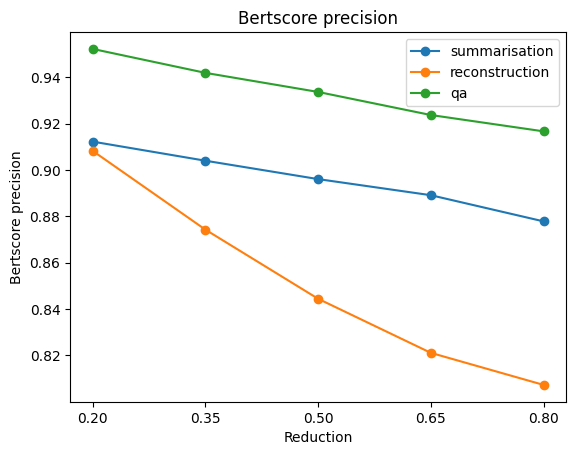

In [37]:
# load the values of bertscore_precision
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]
summarisation_bertscore_precision_values = {reduction: [] for reduction in reduction_values}
reconstruction_bertscore_precision_values = {reduction: [] for reduction in reduction_values}
qa_bertscore_precision_values = {reduction: [] for reduction in reduction_values}

for key in data.keys():
    if 'summarisation' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                summarisation_bertscore_precision_values[reduction].append(data[key]['self-info-phrase']['bertscore_precision'])
    elif 'reconstruction' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                reconstruction_bertscore_precision_values[reduction].append(data[key]['self-info-phrase']['bertscore_precision'])
    elif 'qa' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                qa_bertscore_precision_values[reduction].append(data[key]['self-info-phrase']['bertscore_precision'])

# calculate the avarage bertscore_precision
summarisation_bertscore_precision_values = [np.mean(summarisation_bertscore_precision_values[reduction]) for reduction in reduction_values]
reconstruction_bertscore_precision_values = [np.mean(reconstruction_bertscore_precision_values[reduction]) for reduction in reduction_values]
qa_bertscore_precision_values = [np.mean(qa_bertscore_precision_values[reduction]) for reduction in reduction_values]


# Plot results
plt.plot(reduction_values, summarisation_bertscore_precision_values, 'o-', label='summarisation')
plt.plot(reduction_values, reconstruction_bertscore_precision_values, 'o-', label='reconstruction')
plt.plot(reduction_values, qa_bertscore_precision_values, 'o-', label='qa')


plt.title('Bertscore precision')
plt.xlabel('Reduction')
plt.ylabel('Bertscore precision')

plt.xticks(reduction_values)

plt.legend()
plt.show()



## 7. bertscore_recall

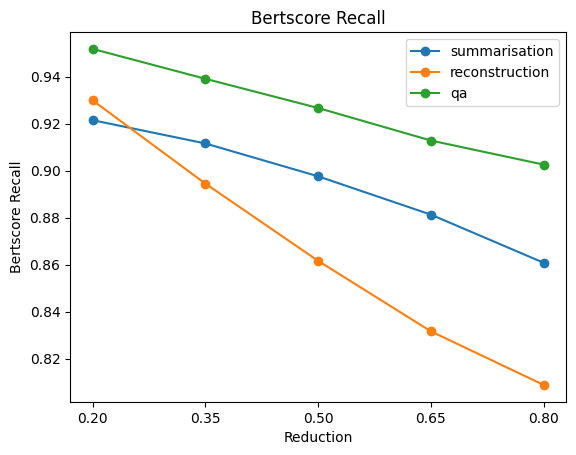

In [36]:
# load the values of bertscore_recall
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]
summarisation_bertscore_recall_values = {reduction: [] for reduction in reduction_values}
reconstruction_bertscore_recall_values = {reduction: [] for reduction in reduction_values}
qa_bertscore_recall_values = {reduction: [] for reduction in reduction_values}

for key in data.keys():
    if 'summarisation' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                summarisation_bertscore_recall_values[reduction].append(data[key]['self-info-phrase']['bertscore_recall'])
    elif 'reconstruction' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                reconstruction_bertscore_recall_values[reduction].append(data[key]['self-info-phrase']['bertscore_recall'])
    elif 'qa' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                qa_bertscore_recall_values[reduction].append(data[key]['self-info-phrase']['bertscore_recall'])

# calculate the average bertscore_recall
summarisation_bertscore_recall_values = [np.mean(summarisation_bertscore_recall_values[reduction]) for reduction in reduction_values]
reconstruction_bertscore_recall_values = [np.mean(reconstruction_bertscore_recall_values[reduction]) for reduction in reduction_values]
qa_bertscore_recall_values = [np.mean(qa_bertscore_recall_values[reduction]) for reduction in reduction_values]

# Plot results
plt.plot(reduction_values, summarisation_bertscore_recall_values, 'o-', label='summarisation')
plt.plot(reduction_values, reconstruction_bertscore_recall_values, 'o-', label='reconstruction')
plt.plot(reduction_values, qa_bertscore_recall_values, 'o-', label='qa')

plt.title('Bertscore Recall')
plt.xlabel('Reduction')
plt.ylabel('Bertscore Recall')

plt.xticks(reduction_values)

plt.legend()
plt.show()


## 8. bestscore_f1

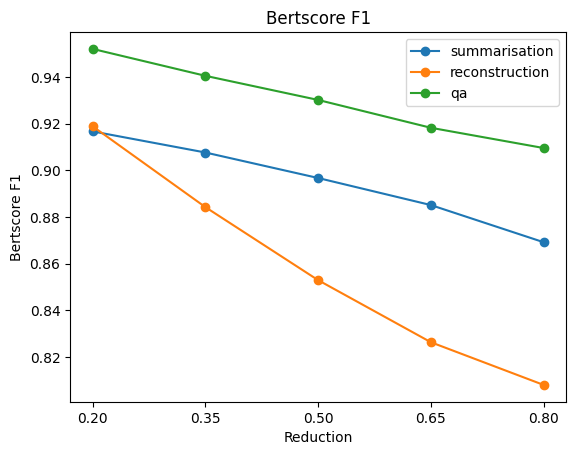

In [38]:
# load the values of bertscore_f1
reduction_values = [0.2, 0.35, 0.5, 0.65, 0.8]
summarisation_bertscore_f1_values = {reduction: [] for reduction in reduction_values}
reconstruction_bertscore_f1_values = {reduction: [] for reduction in reduction_values}
qa_bertscore_f1_values = {reduction: [] for reduction in reduction_values}

for key in data.keys():
    if 'summarisation' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                summarisation_bertscore_f1_values[reduction].append(data[key]['self-info-phrase']['bertscore_f1'])
    elif 'reconstruction' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                reconstruction_bertscore_f1_values[reduction].append(data[key]['self-info-phrase']['bertscore_f1'])
    elif 'qa' in key:
        for reduction in reduction_values:
            if f'_{reduction}' in key:
                qa_bertscore_f1_values[reduction].append(data[key]['self-info-phrase']['bertscore_f1'])

# calculate the average bertscore_f1
summarisation_bertscore_f1_values = [np.mean(summarisation_bertscore_f1_values[reduction]) for reduction in reduction_values]
reconstruction_bertscore_f1_values = [np.mean(reconstruction_bertscore_f1_values[reduction]) for reduction in reduction_values]
qa_bertscore_f1_values = [np.mean(qa_bertscore_f1_values[reduction]) for reduction in reduction_values]


# Plot results
plt.plot(reduction_values, summarisation_bertscore_f1_values, 'o-', label='summarisation')
plt.plot(reduction_values, reconstruction_bertscore_f1_values, 'o-', label='reconstruction')
plt.plot(reduction_values, qa_bertscore_f1_values, 'o-', label='qa')


plt.title('Bertscore F1')
plt.xlabel('Reduction')
plt.ylabel('Bertscore F1')

plt.xticks(reduction_values)

plt.legend()
plt.show()
